In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Introduction

In my first attempt at implementing a ML model, I will use KNN Classification to determine if an individual makes more or less than $50k using selected features.

The data used for the project can be found using the link included:


https://www.kaggle.com/datasets/wenruliu/adult-income-dataset




In [2]:
data = pd.read_csv("/adult.csv")

In [3]:
data.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
data.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Observations

Initially, I can see that there aren't any nulls to deal with. However, columns such as "workclass" and "occupation" have question marks where the individual's information is unknown. To fix this, I will simply replace the question marks with the string "Unknown".

In [6]:
data["workclass"] = data["workclass"].str.replace("?", "Unknown")
data["occupation"] = data["occupation"].str.replace("?", "Unknown")
data.head(10)

<ipython-input-6-c01edb79063f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["workclass"] = data["workclass"].str.replace("?", "Unknown")
<ipython-input-6-c01edb79063f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["occupation"] = data["occupation"].str.replace("?", "Unknown")


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Unknown,227026,HS-grad,9,Never-married,Unknown,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# Feature selection

Now that the unknown's have been sorted, it is time for me to select what features will help the model best classify individual salaries.

I will do this by plotting histograms to visualize potential patterns.

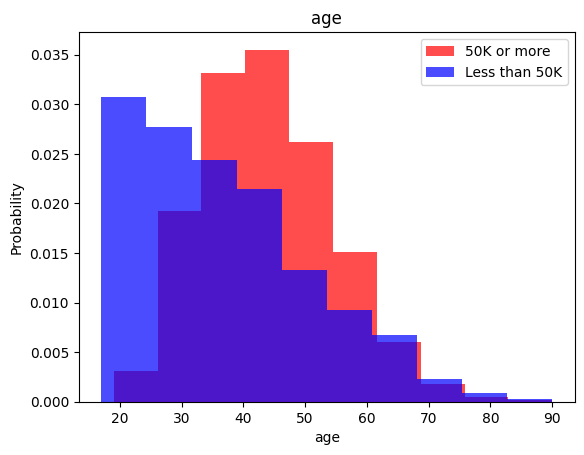

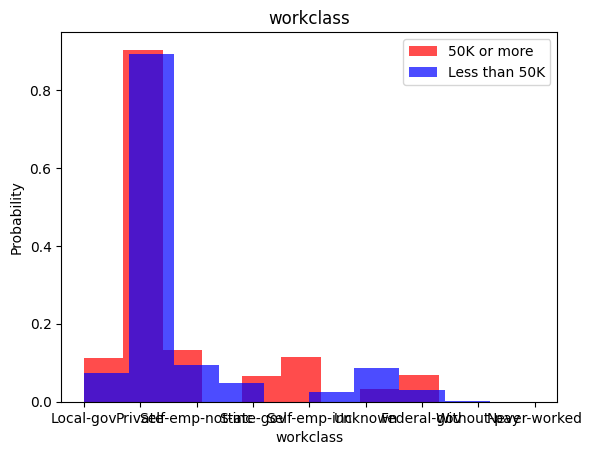

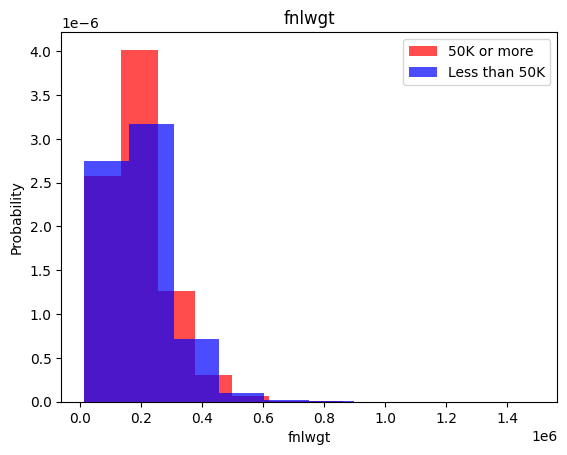

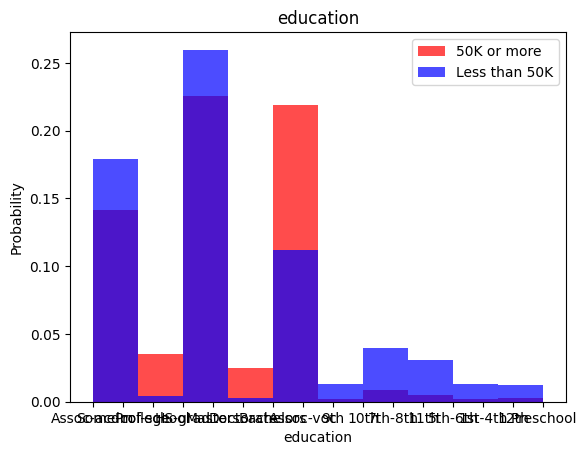

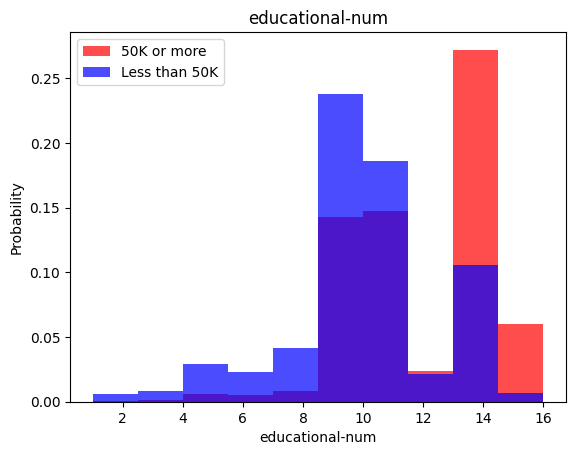

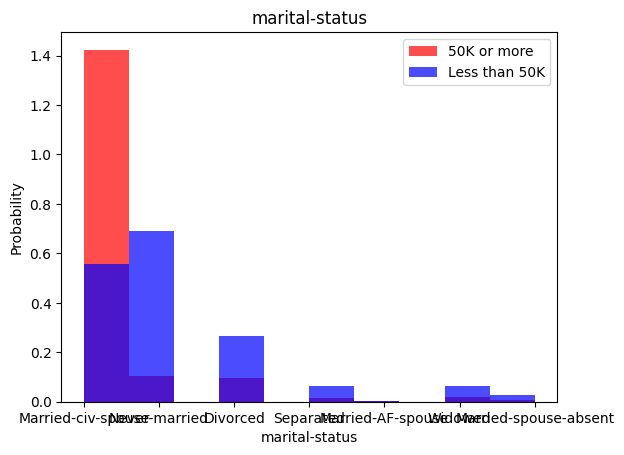

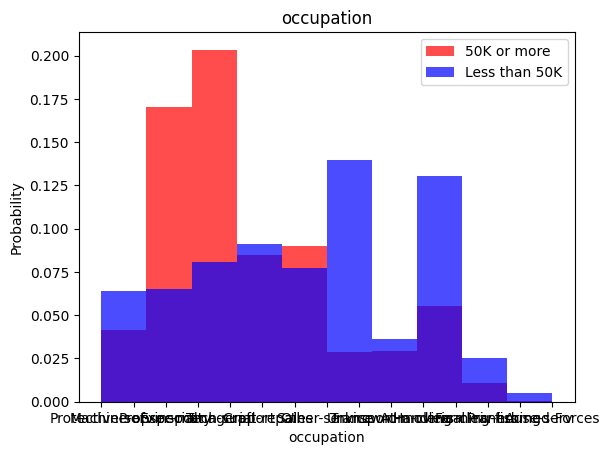

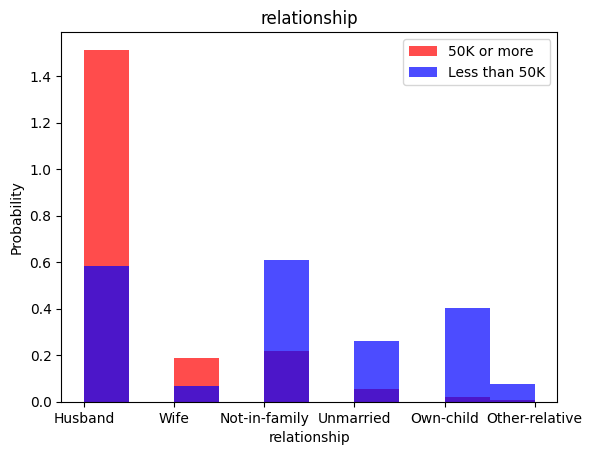

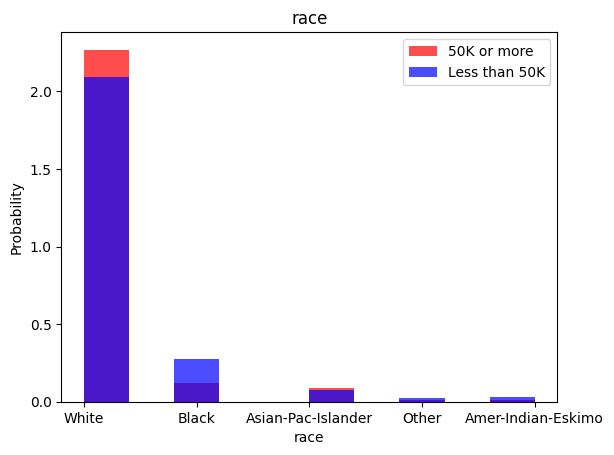

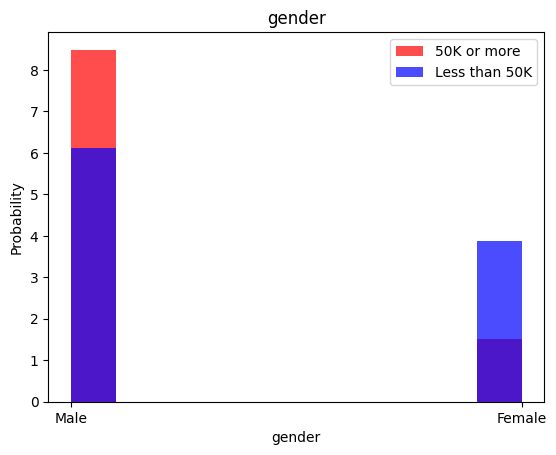

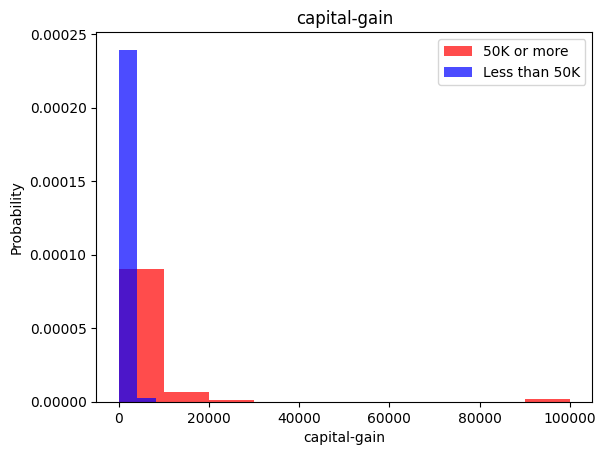

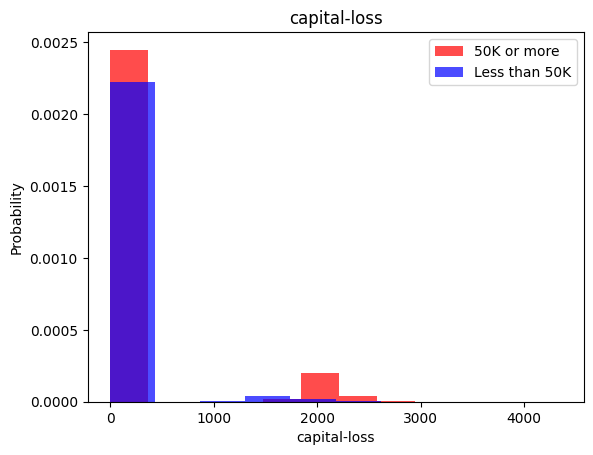

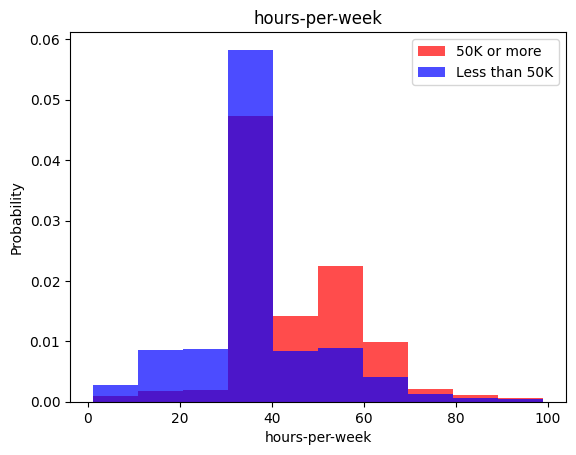

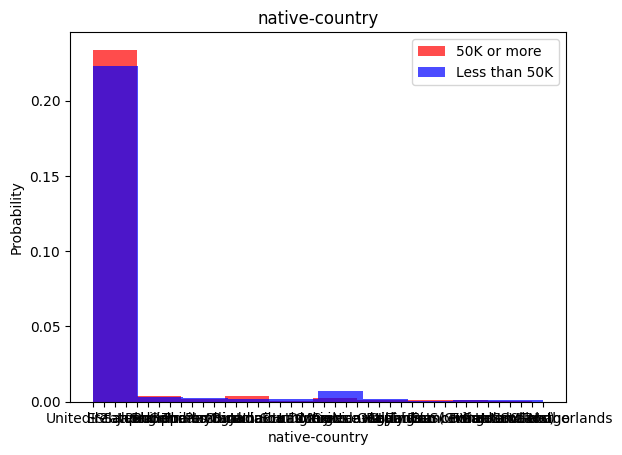

In [7]:
# Visualizations

data_columns = data.columns.tolist()
features = data_columns[:-1]

for feature in features:
  plt.hist(data[data["income"]==">50K"][feature], label="50K or more", color="red", alpha=0.7, density=True)
  plt.hist(data[data["income"]=="<=50K"][feature], label="Less than 50K", color="blue", alpha=0.7, density=True)
  plt.title(feature)
  plt.ylabel("Probability")
  plt.xlabel(feature)
  plt.legend()
  plt.show()

# Observations

The histograms mostly indicate some sort of pattern/relationship with the income of individuals in the dataset. However, I think the "native-country" column needs further investigation.

In [8]:
data["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Investigating the "native-country" column has clarified my doubts about the variance of the countries recorded and has also revealed that native country of 857 people are not specified.

This must be addressed.

In [9]:
data["native-country"] = data["native-country"].str.replace("?", "Other")
data["native-country"] = data["native-country"].str.replace("Holand-Netherlands", "Other")
data["native-country"].value_counts()

<ipython-input-9-b61d931a9426>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["native-country"] = data["native-country"].str.replace("?", "Other")


United-States                 43832
Mexico                          951
Other                           858
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Finally, I have decided to use all the columns as features in an attempt to classify individuals based on income.

# Splitting data into training, test and validation sets.

I will be using a 60/20/20 split for training, test and validation respectively.

In [10]:
train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Defining params for KNN classifier

categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

#Training
X_train = train[features].copy()
Y_train = train["income"]

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

#Test
X_test = test[features].copy()
Y_test = test["income"]

X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

#Validation
X_valid = valid[features].copy()
Y_valid = valid["income"]

X_valid = pd.get_dummies(X_valid, columns=categorical_cols, drop_first=True)



In [12]:
# Fitting model with training data

knn_model = KNeighborsClassifier(n_neighbors=round(np.sqrt(len(train))))
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=171)

In [13]:
# Evaluating the model performance using the Validation data

Y_valid_pred = knn_model.predict(X_valid)
print(classification_report(Y_valid, Y_valid_pred))

              precision    recall  f1-score   support

       <=50K       0.78      1.00      0.88      7439
        >50K       0.97      0.10      0.18      2329

    accuracy                           0.78      9768
   macro avg       0.88      0.55      0.53      9768
weighted avg       0.83      0.78      0.71      9768



#Observations from validation data

The classification report shows that the model does a good job predicting income less than or equal to 50K but struggles with the opposite.

This is likely as a result of the imbalance in classes shown in the support section of the classification report.

To tackle this, I will re-fit another model and add weights with the aim of reducing the imbalance in classes.

In [14]:
# Re-Fitting model with training data

knn = KNeighborsClassifier(n_neighbors=round(np.sqrt(len(train))), weights="distance")
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=171, weights='distance')

In [15]:
# Re-evaluating the model using the validation set

Y_valid_pred_2 = knn.predict(X_valid)
print(classification_report(Y_valid, Y_valid_pred_2))

              precision    recall  f1-score   support

       <=50K       0.79      0.99      0.88      7439
        >50K       0.82      0.16      0.27      2329

    accuracy                           0.79      9768
   macro avg       0.80      0.58      0.58      9768
weighted avg       0.80      0.79      0.73      9768



There is a 10 percent improvement in the f1-score of the ">50K" predictions and a 1% improvement in overall accuracy.

Although not amazing, the weights have slightly improved the performance of the model.

The next step will involve evaluation on the test set.

In [16]:
# Evaluating model on test set

Y_test_pred = knn.predict(X_test)
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.79      0.99      0.88      7441
        >50K       0.81      0.15      0.26      2328

    accuracy                           0.79      9769
   macro avg       0.80      0.57      0.57      9769
weighted avg       0.79      0.79      0.73      9769



#CONCLUSION

The model performs reasonably well when predicting/classifying individuals earning 50K or less annually but does not perform as great when classifying individuals making more than 50K.

As I learn more techniques for optimizing model performance, I will revisit with the aim of improving the model but this project was simply carried out with the aim of implementing my newly acquired knowledge.